# Business Case: Walmart - Confidence Interval and CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


### Business Problem

Management at Walmart Inc decided to analyze customer purchase behavior based on gender, age, and marital status in order to increase sales on Black Friday. This will enable management to make more informed decisions.



The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

 - User_ID:	User ID
 - Product_ID:	Product ID
 - Gender:	Sex of User
 - Age:	Age in bins
 - Occupation:	Occupation(Masked)
 - City_Category:	Category of the City (A,B,C)
 - StayInCurrentCityYears:	Number of years stay in current city
 - Marital_Status:	Marital Status
 - ProductCategory:	Product Category (Masked)
 - Purchase:	Purchase Amount


### Importing the required libraries or packages for EDA 

In [504]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics
from scipy.stats import norm

## Utility Functions - Used during Analysis

### Missing Value - Calculator

In [505]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

### Categorical Variable Analysis 
  - Bar plot - Frequency of feature in percentage
  - Pie Chart

In [506]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("Paired"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("Paired"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1


### Frequency Graph in percentage

In [507]:
# Frequency of each feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    fig = plt.figure(figsize=(32, 36))
    fig.set_facecolor("lightgrey")
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('Paired'))
        plt.xticks(rotation = 70,fontsize=14,family="Comic Sans MS")
        plt.yticks(fontsize=14,family="Comic Sans MS")
        plt.ylabel(string, fontsize=14,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        string = "Frequency of "

### Bi-Varainte Analysis for Numerical and Categorical variables
 - Used Box plot

In [508]:
def num_cat_bi(df,col_cat,col_num,nrows=1,mcols=2,width=15,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    i = 0
    while rows < nrows:
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][0],palette="Paired")
        ax[rows][0].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        i += 1
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][1],palette="Paired")
        ax[rows][1].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        i += 1
        rows += 1
    plt.show()

### Distribution plot based on the Male and Female

In [509]:
def bar_M_vs_F(colname):
    fig = plt.figure(figsize=(16,6))

    male = retail_data_v1[retail_data_v1["Gender"]=='M'][colname].value_counts().reset_index()
    male["percentage"]  = (male[colname]*100/male[colname].sum())
    male["legends"]        = "Male"


    female = retail_data_v1[retail_data_v1["Gender"]=='F'][colname].value_counts().reset_index()
    female["percentage"] = (female[colname]*100/female[colname].sum())
    female["legends"]    = "Female"

    m_f_status = pd.concat([female,male],axis=0)

    ax = sns.barplot("index","percentage",data=m_f_status,hue="legends",palette="Blues_d")
    plt.xlabel(colname)
    fig.set_facecolor("white")
    plt.title(colname + "percentage in data with respect to churn status")
    plt.show()

### Multi-Varainte Analysis for Numerical and Categorical variables
 - Used Box plot

In [510]:
def num_cat_bi_grpby(df,colname,category,groupby,nrows=1,mcols=2,width=18,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var,hue=groupby, data = df,ax=ax[rows][0],palette="Set3")
        sns.lineplot(x=df[category],y=df[var],ax=ax[rows][1],hue=df[groupby],palette="bright") 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        ax[rows][0].legend(loc='lower right')
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

### Function for Booststrapping technique to calculate the CI

In [511]:
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [512]:
def bootstrapping_m_vs_um(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [513]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

## Exploratory Data Analysis

### Loading and inspecting the Dataset

#### Loading the csv file

In [514]:
retail_data = pd.read_csv("./walmart_data.csv")

In [515]:
retail_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Checking Shape and Column names

In [516]:
retail_data.shape

(550068, 10)

In [517]:
retail_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

#### Validating Duplicate Records

In [518]:
retail_data.duplicated().sum()

0

### Inference
  - No dupicates records found.

#### Missing Data Analysis

In [519]:
missingValue(retail_data).head(5)

Total records =  550068


,Total Missing,In Percent
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0


### Inference
  - No missing value found.

#### Unique values (counts) for each Feature

In [520]:
retail_data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Inference
 - The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products.

### A deep dive into User ID
 - Based on 5891 user IDs, how many are married, male or female, or the age of the users.

In [521]:
retail_data.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [522]:
print("Females are ", 1666/5891)
print("Females are ", 4225/5891)

Females are  0.2828042777117637
Females are  0.7171957222882362


### Inference
 - The percentage of women customers is only 28%
 - Around 72% of customers are male

In [523]:
retail_data.groupby(['Age'])['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [524]:
retail_data.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [525]:
retail_data.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [526]:
retail_data.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

### Unique values (names) are checked for each Features

In [527]:
colname = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Occupation']
for col in colname:
    print("\nUnique values of ",col," are : ",list(retail_data[col].unique()))


Unique values of  Gender  are :  ['F', 'M']

Unique values of  Age  are :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Unique values of  City_Category  are :  ['A', 'C', 'B']

Unique values of  Stay_In_Current_City_Years  are :  ['2', '4+', '3', '1', '0']

Unique values of  Marital_Status  are :  [0, 1]

Unique values of  Product_Category  are :  [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]

Unique values of  Occupation  are :  [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]


### Inferences 
 - All the values looks good.

### DataType Validation

In [528]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Inferencce
 - **'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status'** are categorical variables. As a result, we need to change the datatype to category.

In [529]:
cols = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
for col_name in cols:
    retail_data[col_name] = retail_data[col_name].astype("category")

In [530]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.3+ MB


### Basic Statistics Analysis - count, min, max, and mean

In [531]:
retail_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [532]:
retail_data.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


In [533]:
retail_data.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [534]:
retail_data.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [535]:
retail_data.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [536]:
retail_data.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [537]:
retail_data.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

### Inferences
 - There are more single people than married people.
 - Most mall customers are between the ages of **26 and 35**.
 - The majority of our customers come from **city category B ** but customers come from **City category C spent more as mean is 9719**.
 - Male customers tend to spend more than female customers, as the mean is higher for male customers.
 - The majority of users come from **City Category C, but more people from City Category B tend to purchase**, which suggests the same users visit the mall multiple times in City Category B.

### Correlation Analysis

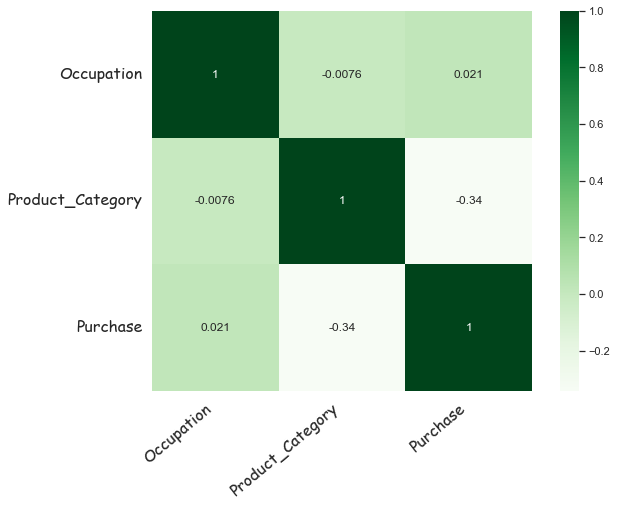

In [538]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(retail_data.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

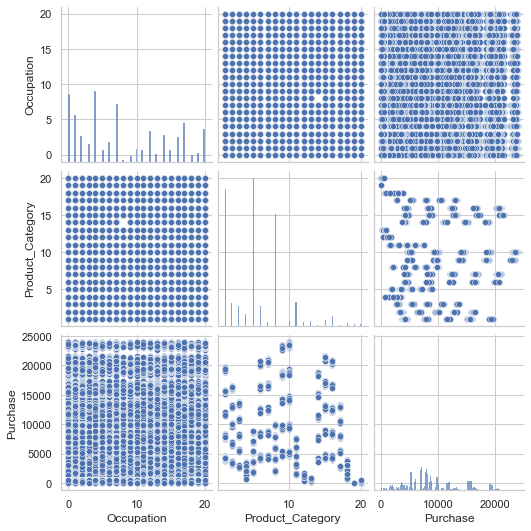

In [539]:
sns.pairplot(retail_data)

### Inference
  - Mostly features are categorical and not much correlation can be observed from above graphs.

## Univariante Analysis
  - Numerical Variables
  - Categorial variables 


### Numerical Variables - Outlier detection

In [540]:
retail_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

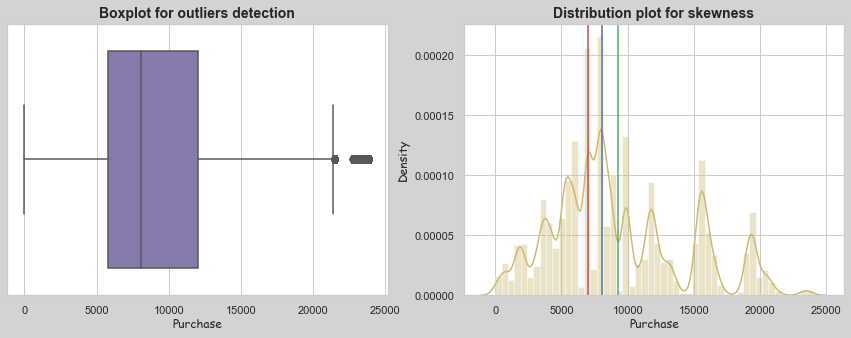

In [541]:
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(retail_data["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.distplot(retail_data["Purchase"],color='y')

plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.ylabel('Density', fontsize=12,family = "Comic Sans MS")
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")
plt.axvline(retail_data["Purchase"].mean(),color="g")
plt.axvline(retail_data["Purchase"].median(),color="b")
plt.axvline(retail_data["Purchase"].mode()[0],color="r")

plt.show()

### Inferences
 - Above graphs ;ooks like "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
 - **Majority of Customers** purchase within the **5,000 - 20,000** range.

### Handling outliers

In [542]:
retail_data_v1 = retail_data.copy()

In [543]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = retail_data_v1['Purchase'].quantile(0.75)
Q1 = retail_data_v1['Purchase'].quantile(0.25)
IQR = Q3-Q1
retail_data_v1 = retail_data_v1[(retail_data_v1['Purchase'] > Q1 - 1.5*IQR) & (retail_data_v1['Purchase'] < Q3 + 1.5*IQR)]

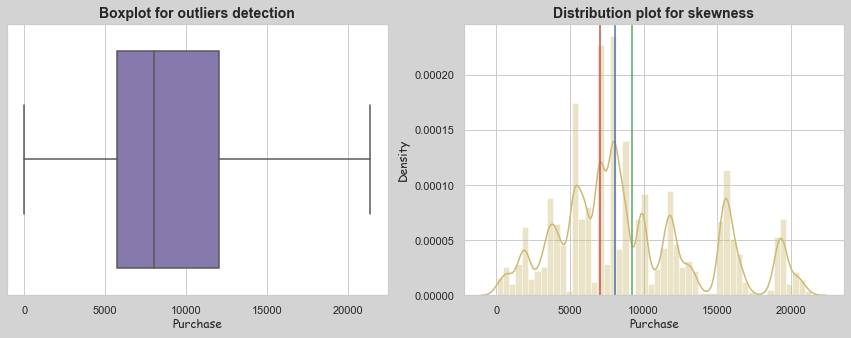

In [544]:
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(retail_data_v1["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.distplot(retail_data_v1["Purchase"],color='y')

plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.ylabel('Density', fontsize=12,family = "Comic Sans MS")
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")
plt.axvline(retail_data_v1["Purchase"].mean(),color="g")
plt.axvline(retail_data_v1["Purchase"].median(),color="b")
plt.axvline(retail_data_v1["Purchase"].mode()[0],color="r")

plt.show()

### Categorical variable Uni-variante Analysis

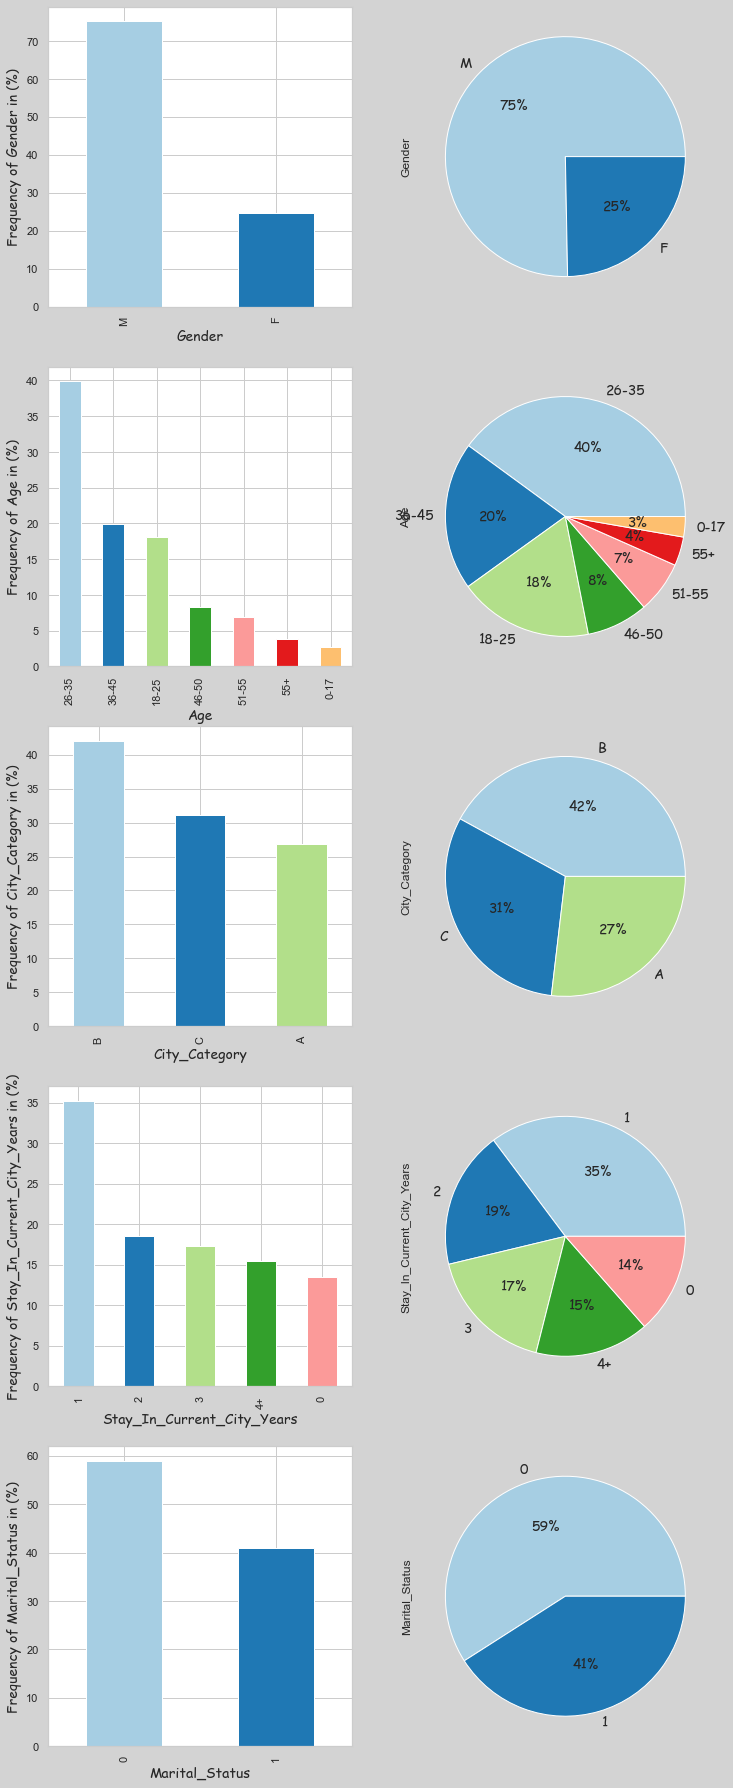

In [545]:
cat_colnames = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
cat_analysis(retail_data_v1,cat_colnames,5,2,12,32)

### Inferences
  - Males clearly purchase more than females. **75%** of men and only **25%** of women purchase products.
  - **60%** of purchases are made by people between the ages of 26 and 45
  - City Category **B accounts for 42%**, City Category **C 31%**, and City Category **A represents 27%** of all customer purchases.

In [546]:
retail_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

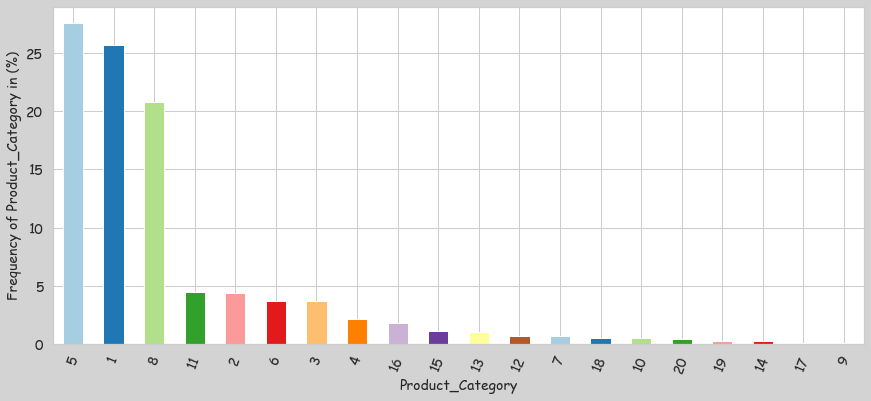

In [547]:
bar_plot_percentage(retail_data_v1,['Product_Category'])

### Inference
 - Product Category 5,1 & 8 are the products that customers buy the most.

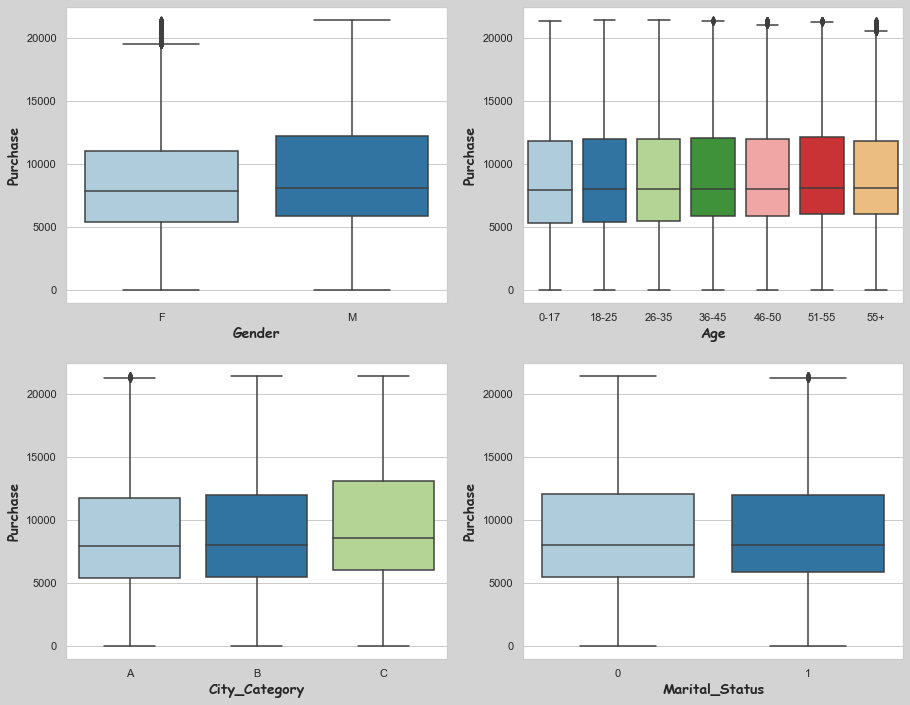

In [548]:
col_cat = ['Gender', 'Age','City_Category','Marital_Status']
num_cat_bi(retail_data_v1,col_cat,'Purchase',2,2,15,12)

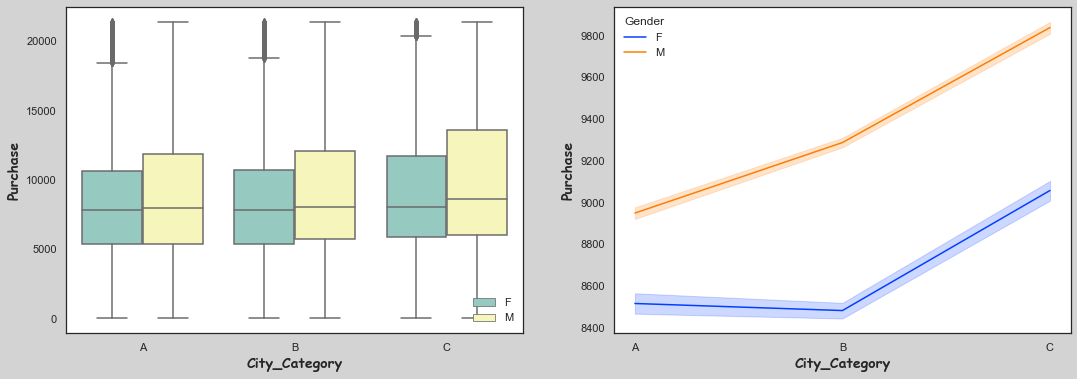

In [549]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"City_Category",'Gender')

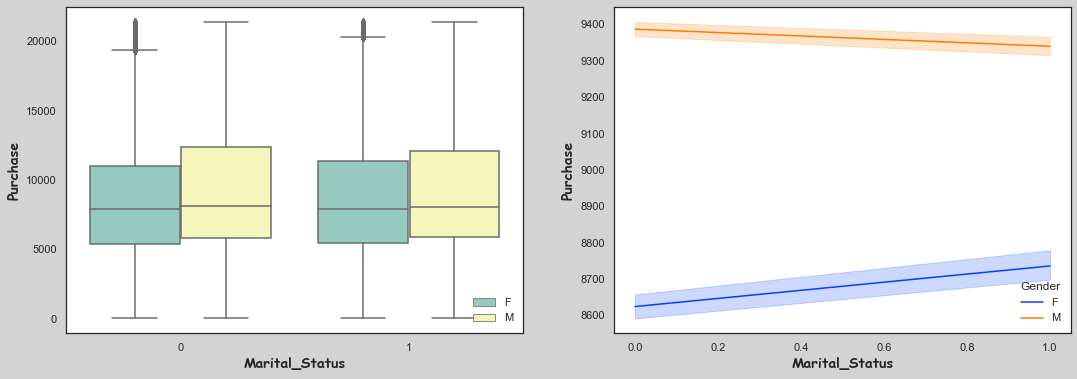

In [550]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"Marital_Status",'Gender')

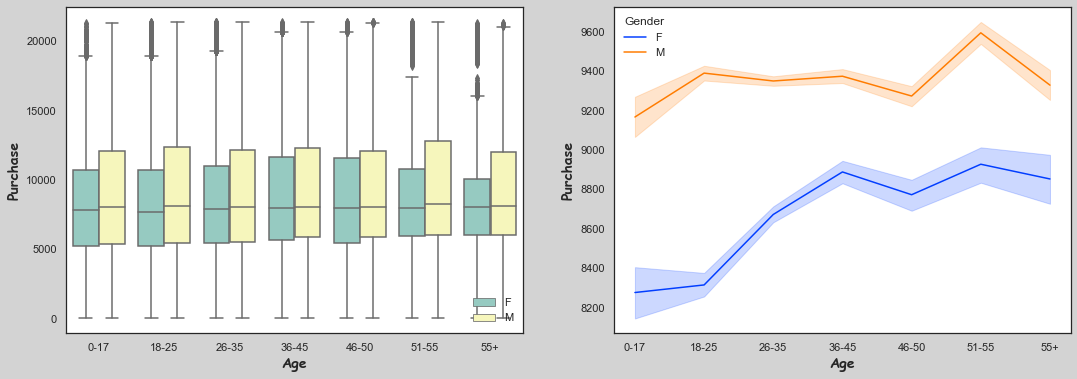

In [551]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"Age",'Gender')

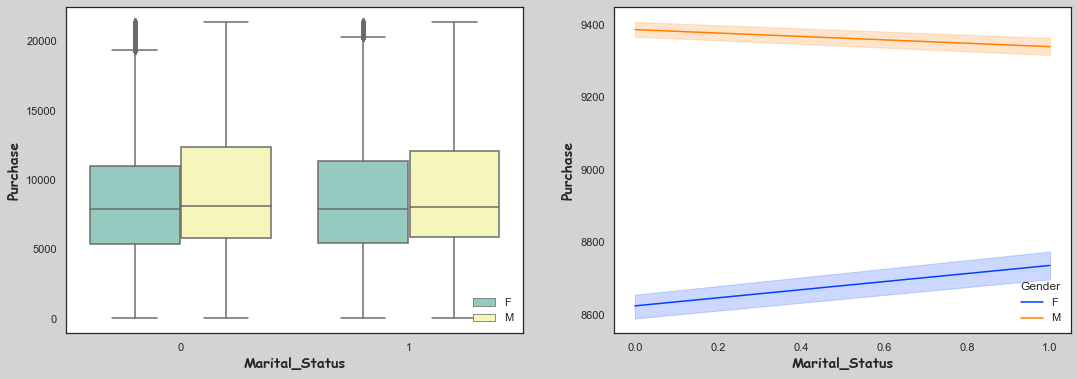

In [552]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"Marital_Status",'Gender')

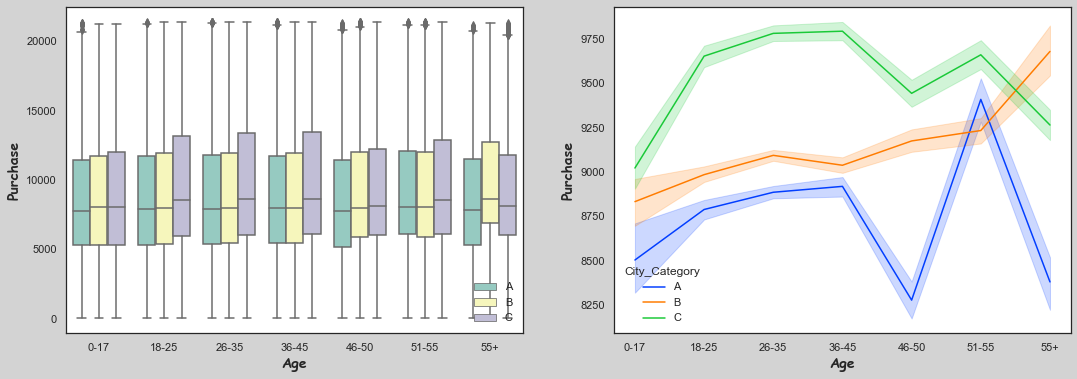

In [553]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"Age",'City_Category')

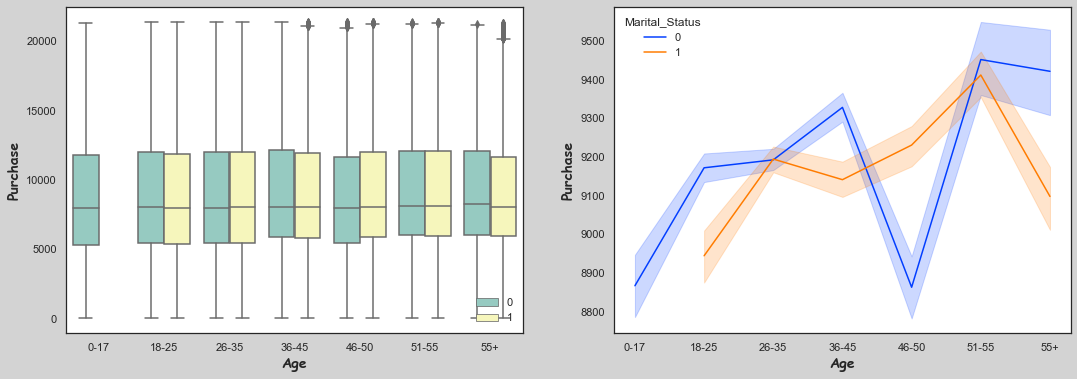

In [554]:
col_num = [ 'Purchase']
num_cat_bi_grpby(retail_data_v1,col_num,"Age",'Marital_Status')

### Inferences
 - Purchases are high in city category C
 - Purchase is the same for all age groups
 - Most of the customers are 55+ and live in city category B
 - City category C has more customers between the ages of 18 and 45. 

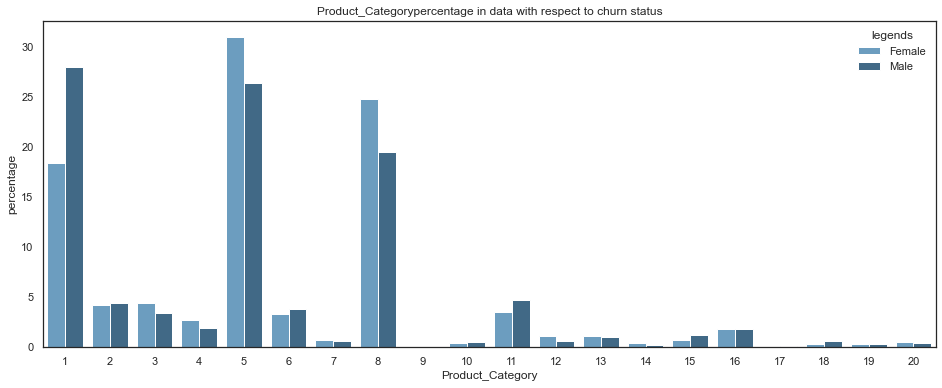

In [555]:
bar_M_vs_F('Product_Category')

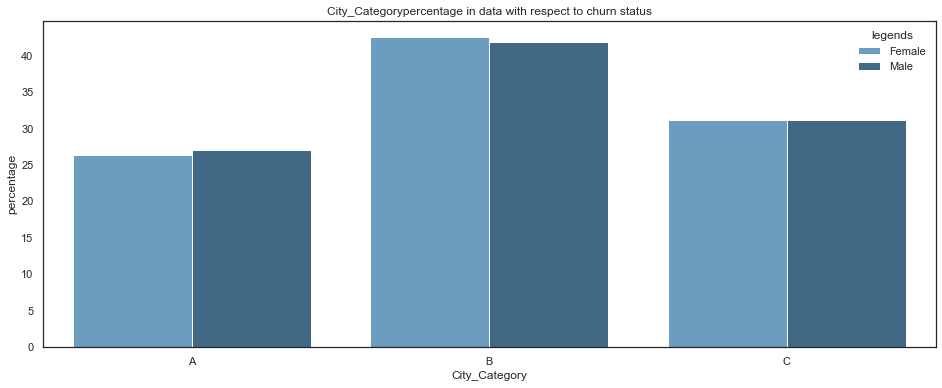

In [556]:
bar_M_vs_F('City_Category')

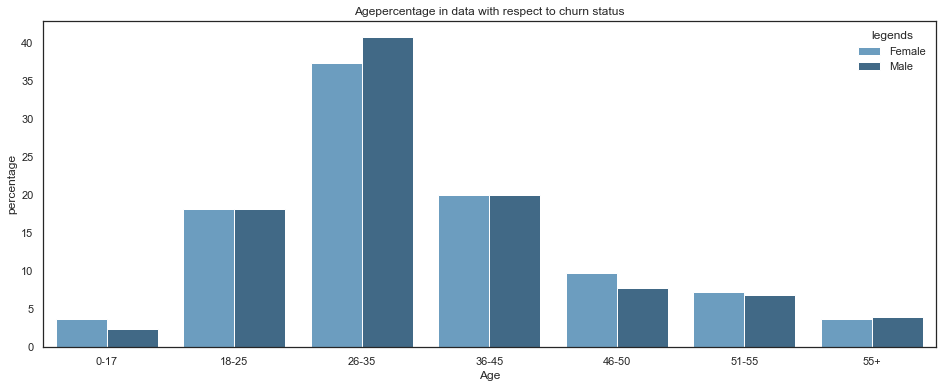

In [557]:
bar_M_vs_F('Age')

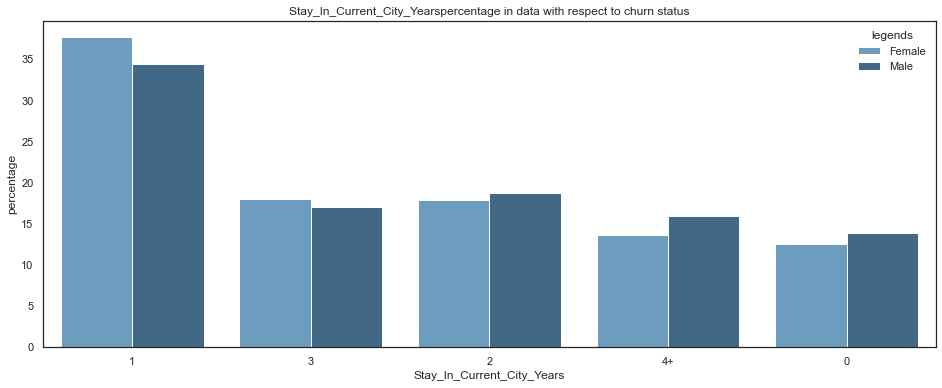

In [558]:
bar_M_vs_F('Stay_In_Current_City_Years')

### Inferences
 - Product 5 and 8 is common among females. 
 - In City Category C, there are slightly more female customers.

In [559]:
print(retail_data_v1.groupby(['Gender','City_Category'])['User_ID'].count())

Gender  City_Category
F       A                 35552
        B                 57572
        C                 42096
M       A                111484
        B                172542
        C                128145
Name: User_ID, dtype: int64


<Figure size 1800x720 with 0 Axes>

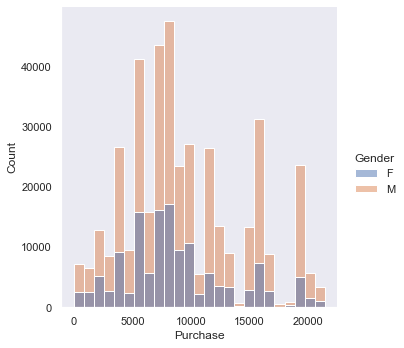

In [560]:
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.set(style='dark')
sns.displot(x= 'Purchase',data=retail_data_v1,hue='Gender',bins=25)
plt.show()

### Inference
 - The amount of money spent by women is less than that spent by men

In [561]:
retail_data_v1.sample(500,replace=True).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,116.0,8058.413793,4043.700918,362.0,5460.0,7834.5,9825.75,20707.0
M,384.0,9546.690104,5048.670908,127.0,5986.5,8115.0,12350.00,21304.0


### Inference
 - Even the sample mean shows that males spend more than females.

In [562]:
retail_data_v1.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


In [563]:
retail_data_v1.shape

(547391, 10)

### Inference
 - Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

In [564]:
retail_data_smp_male = retail_data_v1[retail_data_v1['Gender'] == 'M']['Purchase']
retail_data_smp_female = retail_data_v1[retail_data_v1['Gender'] == 'F']['Purchase']

In [565]:
print("Male Customers : ",retail_data_smp_male.shape[0])
print("Female Customers : ",retail_data_smp_female.shape[0])

Male Customers :  412171
Female Customers :  135220


## Calculate Confidence Interval (CI) - to estimate the mean weight of the expenses by female and male customers.


### Central limit Theorem
The central limit theorem states that **the sampling distribution of a sample mean** is approximately **normal** if the sample size is large enough, even if the **population distribution is not normal.**

### Assumptions
- **Randomization:** The data must be sampled randomly such that every member in a population has an equal probability of being selected to be in the sample.
- **Independence:** The sample values must be independent of each other.
- **The 10% Condition:** When the sample is drawn without replacement, the sample size should be no larger than 10% of the population.
- **Large Sample Condition:** The sample size needs to be sufficiently large.

### Calculate CI using Bootstrapping
 - We will be using Bootstrapping method to estimate the confidence interval of the population mean of the expenses by female and Male customers.

### Bootstrapping
Bootstrapping is a method that can be used to estimate the standard error of any statistic and produce a confidence interval for the statistic.

The basic process for bootstrapping is as follows:

- Take k repeated samples with replacement from a given dataset.
- For each sample, calculate the statistic you’re interested in.
- This results in k different estimates for a given statistic, which you can then use to calculate the standard error of the statistic and create a confidence interval for the statistic.

### Calculate z-critical
 - Calculate the significance level : alpha = (1 - confidence interval)/ number of tails
 - Z-Table lookup value is (1 -  α )
 - Find the y-axis value, then the x-axis value 
 - Critical value = y-axis value + x-axis value

### CLT Analysis for mean purchase with confidence 90% - Based on Gender
 - Analysis of the true mean of purchase values by gender with a 90% confidence

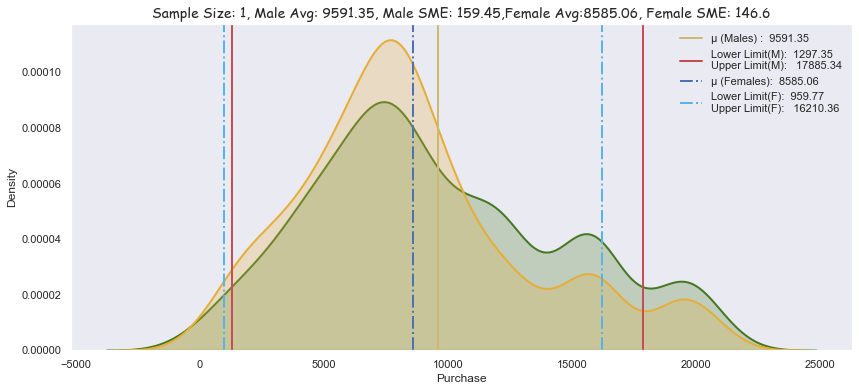

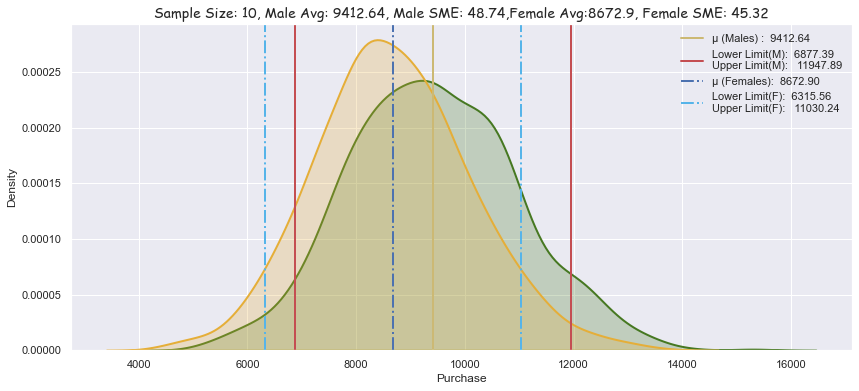

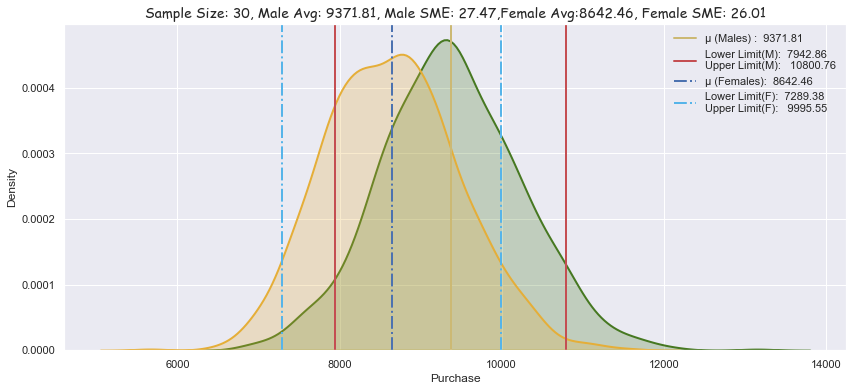

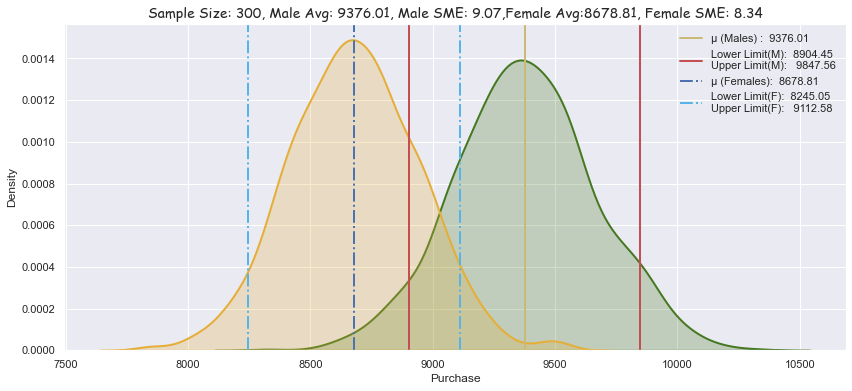

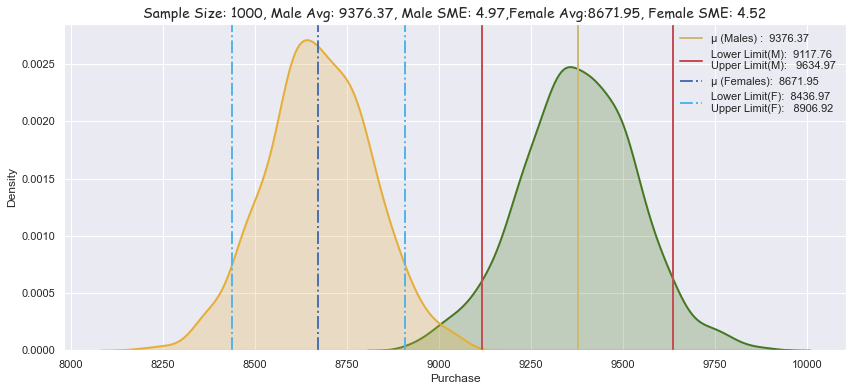

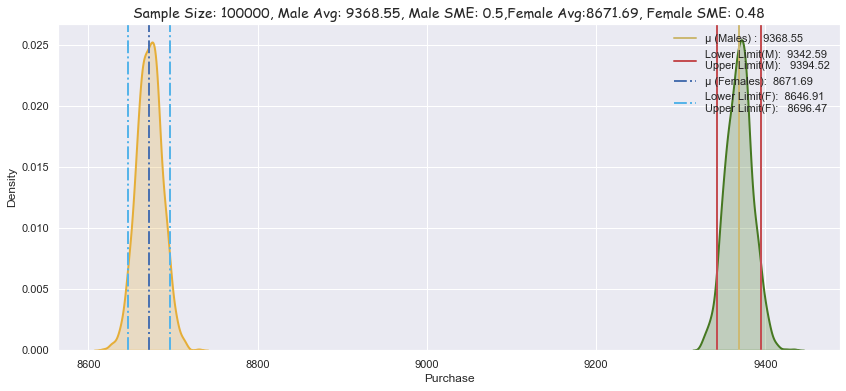

In [566]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.90

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),90]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()

In [567]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
6,M,8904.45,9847.56,300,"[8904.45, 9847.56]",943.11,90
8,M,9117.76,9634.97,1000,"[9117.76, 9634.97]",517.21,90
10,M,9342.59,9394.52,100000,"[9342.59, 9394.52]",51.93,90


In [568]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
7,F,8245.05,9112.58,300,"[8245.05, 9112.58]",867.53,90
9,F,8436.97,8906.92,1000,"[8436.97, 8906.92]",469.95,90
11,F,8646.91,8696.47,100000,"[8646.91, 8696.47]",49.56,90


### Inferences
 - As the sample size increases, the two groups start to become distinct 
 - With increasing sample size, Standard error of the mean in the samples decreases.
 - For sample size **100000 is 0.49**
 - For Female (sample size 100000) range for mean purchase with confidence interval 90% is **[8645.68, 8696.14]**
 - For Male range for mean purchase with confidence interval 90% is **[9341.03, 9393.94]**

### CLT Analysis for mean purchase with confidence 95% - Based on Gender
 - Analysis of the true mean of purchase values by gender with a 95% confidence

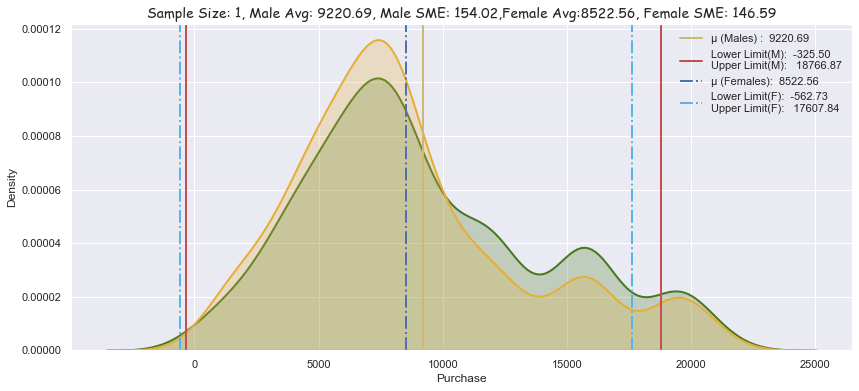

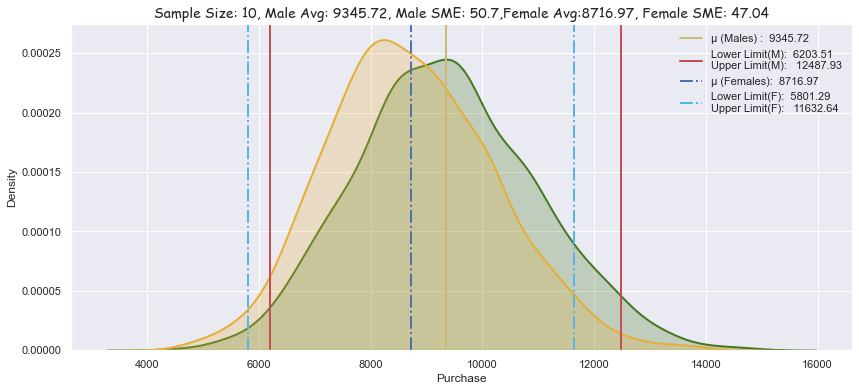

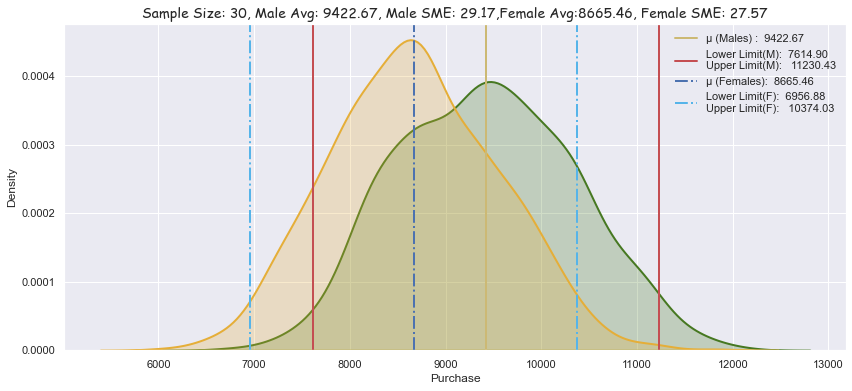

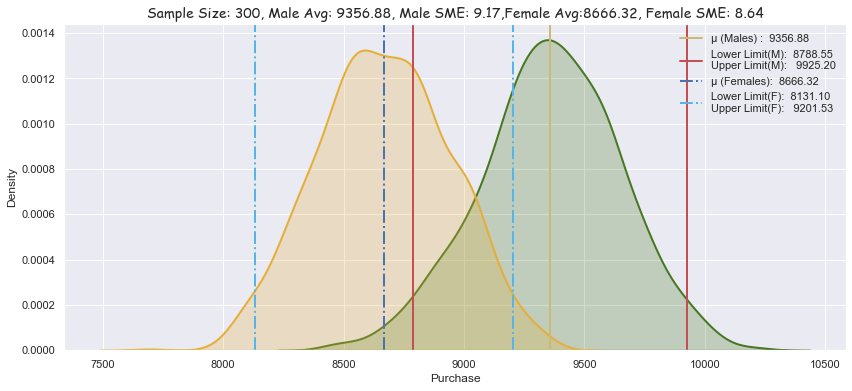

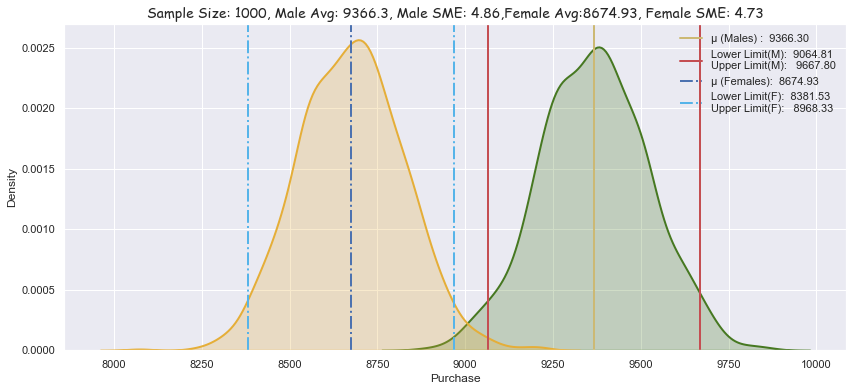

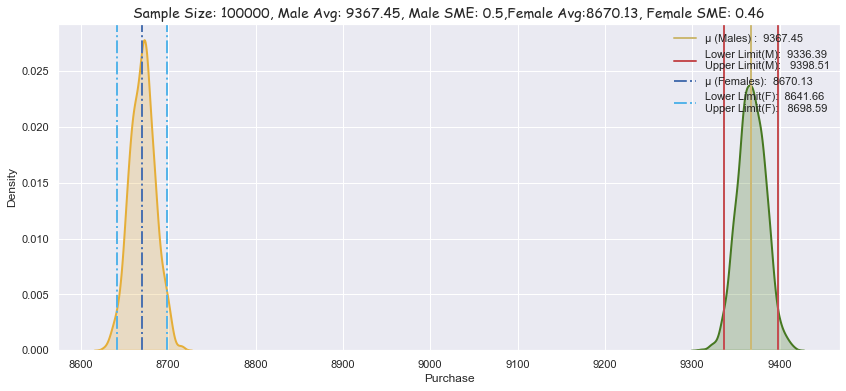

In [569]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_95], axis=0)

In [570]:
overlap_95.loc[(overlap_95['Gender'] == 'M') & (overlap_95['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
6,M,8788.55,9925.2,300,"[8788.55, 9925.2]",1136.65,95
8,M,9064.81,9667.8,1000,"[9064.81, 9667.8]",602.99,95
10,M,9336.39,9398.51,100000,"[9336.39, 9398.51]",62.12,95


In [571]:
overlap_95.loc[(overlap_95['Gender'] == 'F') & (overlap_95['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
7,F,8131.1,9201.53,300,"[8131.1, 9201.53]",1070.43,95
9,F,8381.53,8968.33,1000,"[8381.53, 8968.33]",586.8,95
11,F,8641.66,8698.59,100000,"[8641.66, 8698.59]",56.93,95


### Inferences
 - Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%- 
 - As the sample size increases, the Male and female groups start to become distinct 
 - With increasing sample size, Standard error of the mean in the samples decreases. For sample size **100000 is 0.47**
 - For Female (sample size 100000) range for mean purchase with confidence interval 90% is **[8642.58, 8701.58]**
 - For Male range for mean purchase with confidence interval 95% is **[9336.23, 9397.53]**
 - Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### CLT Analysis for mean purchase with confidence 99% - Based on Gender
 - Analysis of the true mean of purchase values by gender with a 99% confidence.

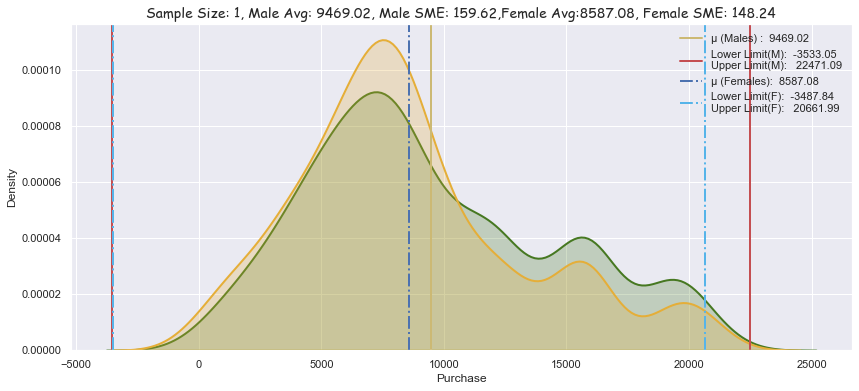

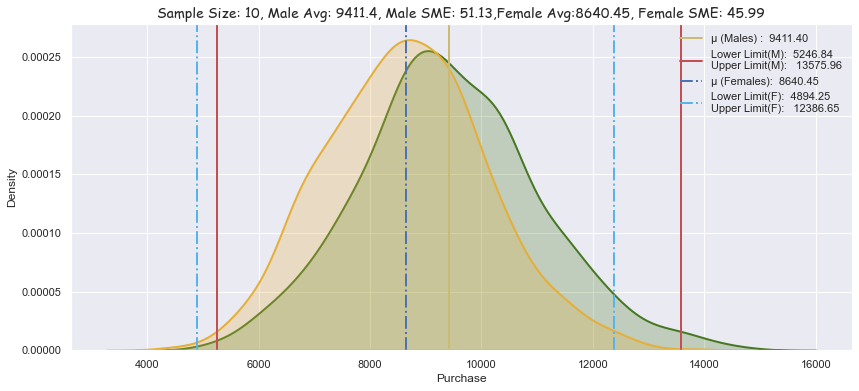

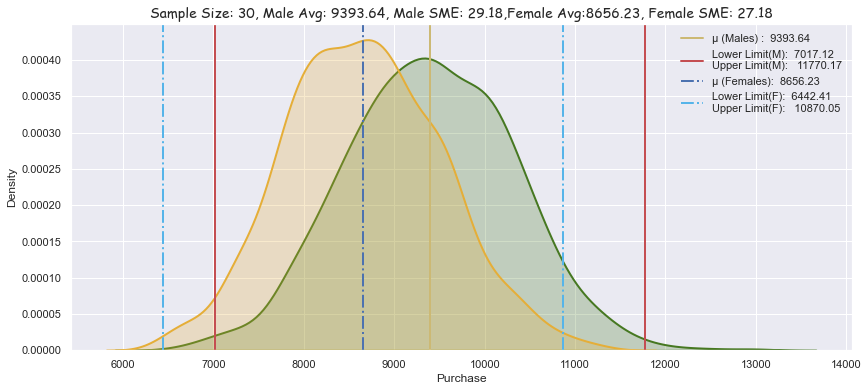

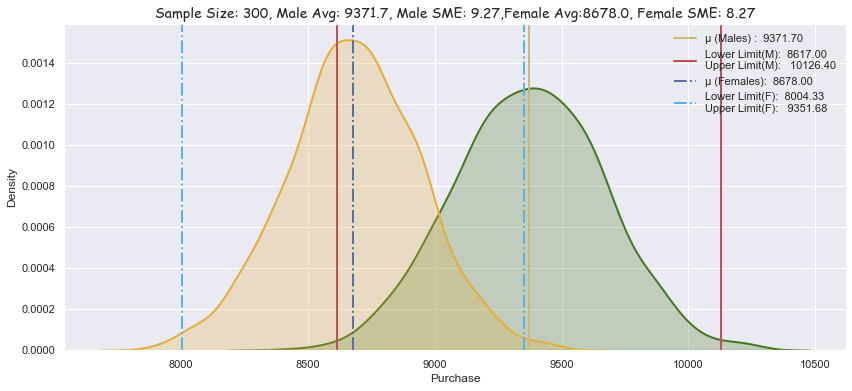

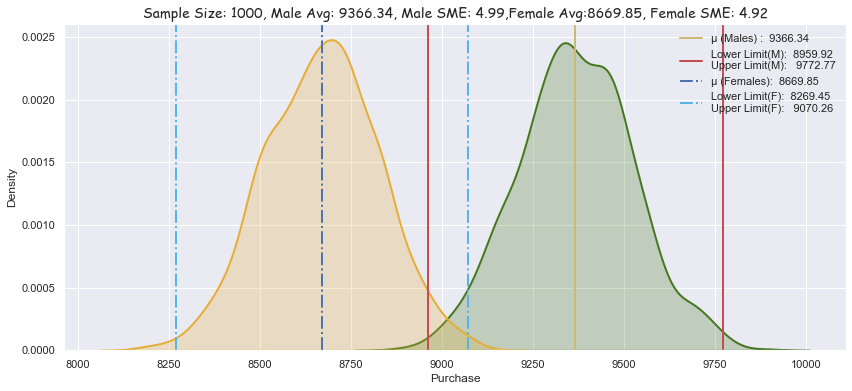

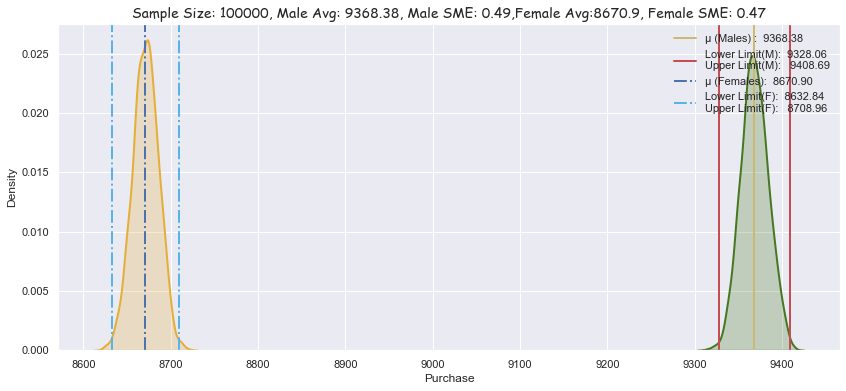

In [572]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),99]]), axis=0)

overlap_99 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_99], axis=0)

In [573]:
overlap_99.loc[(overlap_99['Gender'] == 'M') & (overlap_99['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
6,M,8617.0,10126.4,300,"[8617.0, 10126.4]",1509.4,99
8,M,8959.92,9772.77,1000,"[8959.92, 9772.77]",812.85,99
10,M,9328.06,9408.69,100000,"[9328.06, 9408.69]",80.63,99


In [574]:
overlap_99.loc[(overlap_99['Gender'] == 'F') & (overlap_99['Sample_Size'] >= 300)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
7,F,8004.33,9351.68,300,"[8004.33, 9351.68]",1347.35,99
9,F,8269.45,9070.26,1000,"[8269.45, 9070.26]",800.81,99
11,F,8632.84,8708.96,100000,"[8632.84, 8708.96]",76.12,99


In [575]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 10000)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
10,M,9342.59,9394.52,100000,"[9342.59, 9394.52]",51.93,90
10,M,9336.39,9398.51,100000,"[9336.39, 9398.51]",62.12,95
10,M,9328.06,9408.69,100000,"[9328.06, 9408.69]",80.63,99


In [576]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 10000)]

,Gender,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
11,F,8646.91,8696.47,100000,"[8646.91, 8696.47]",49.56,90
11,F,8641.66,8698.59,100000,"[8641.66, 8698.59]",56.93,95
11,F,8632.84,8708.96,100000,"[8632.84, 8708.96]",76.12,99


### Inferences
 - Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%- 
 - As the sample size increases, the Male and female groups start to become distinct 
 - With increasing sample size, Standard error of the mean in the samples decreases. For sample size **100000 is 0.45**
 - For Female (sample size 100000) range for mean purchase with confidence interval 99% is **[8634.54, 8707.85]**
 - For Male range for mean purchase with confidence interval 90% is **[9328.03, 9409.07]**
 - When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as **[90,95,99]** have difference between the upper & lower limits as **[50.46,59,73.31]**

### Recommendations 
 - In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

### Calculate Confidence Interval (CI) - to estimate the mean weight of the expenses by married and unmarried customers.¶

### CLT Analysis for mean purchase with confidence 99% - Based on Marital Status
 - Analysis of the true mean of purchase values by marital Status with a 99% confidence.

In [577]:
retail_data_v1['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
retail_data_v1['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [578]:
retail_data_v1.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,295.0,9127.044068,4914.045057,132.0,5970.0,8131.0,11844.0,21160.0
Married,205.0,9132.795122,4869.420265,25.0,6037.0,8014.0,11748.0,20494.0


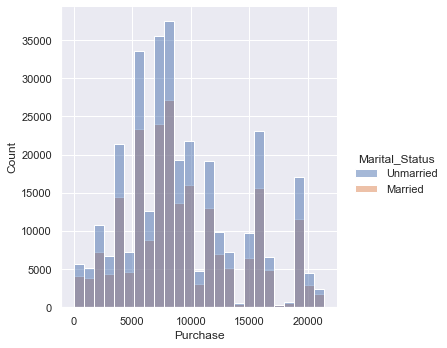

In [579]:
sns.displot(data = retail_data_v1, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [580]:
retail_data_smp_married = retail_data_v1[retail_data_v1['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = retail_data_v1[retail_data_v1['Marital_Status'] == 'Unmarried']['Purchase']

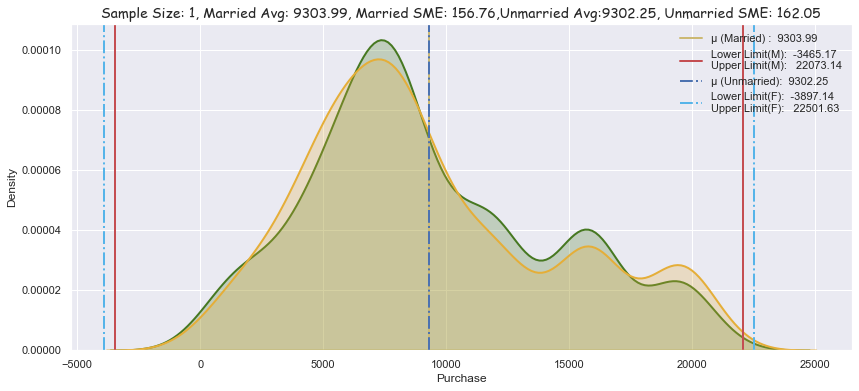

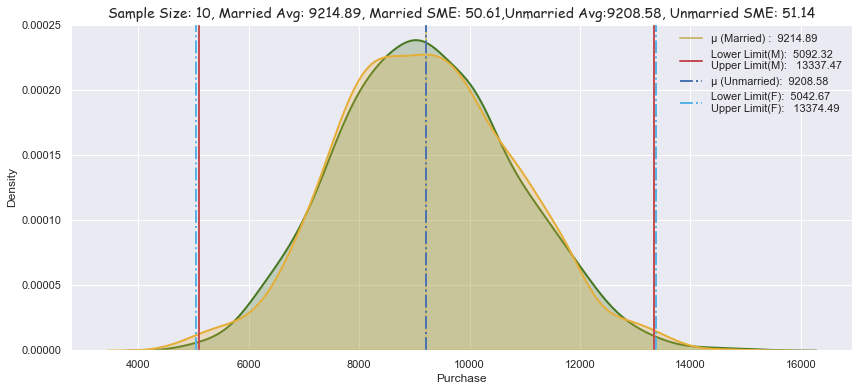

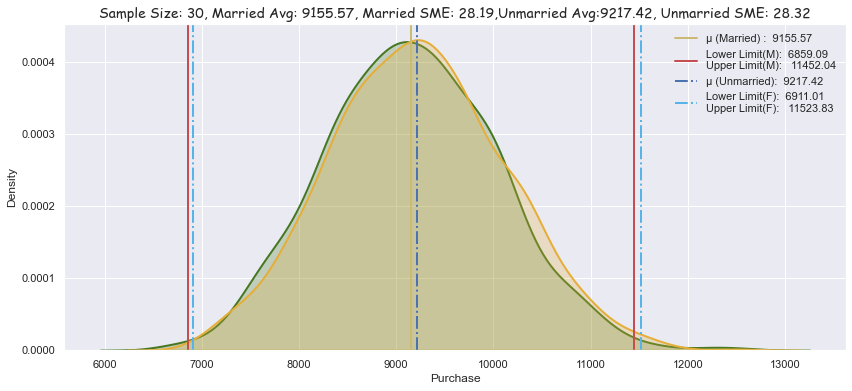

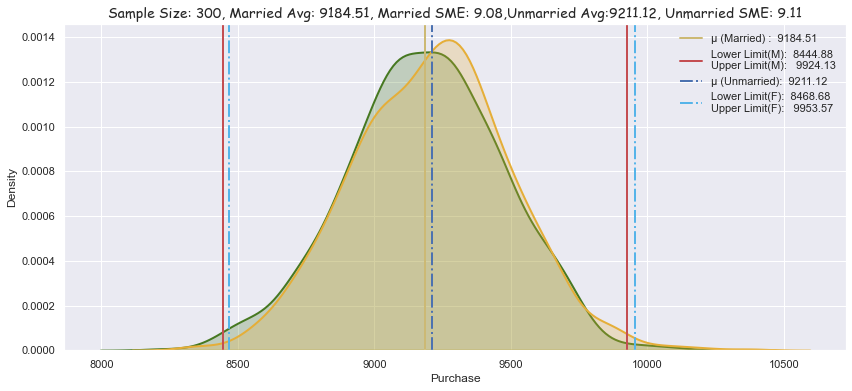

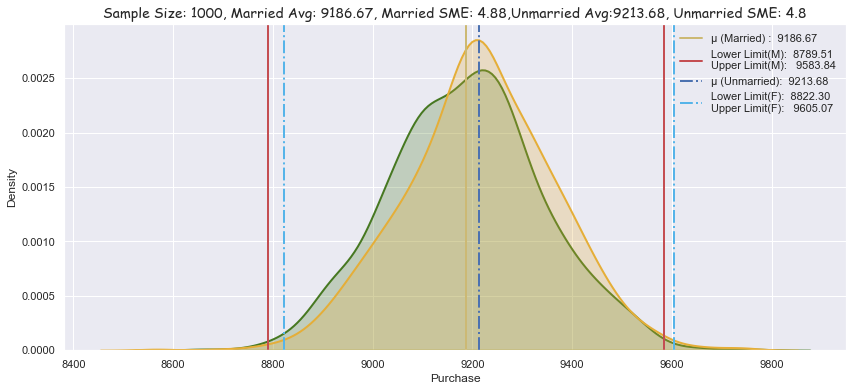

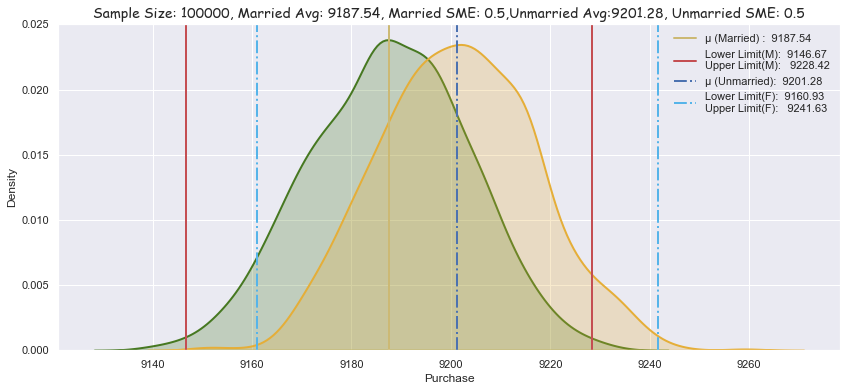

In [581]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(retail_data_smp_married,retail_data_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])


In [582]:
overlap.head()

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
0,Married,-3465.17,22073.14,1,"[-3465.17, 22073.14]",25538.31,99
1,Unmarried,-3897.14,22501.63,1,"[-3897.14, 22501.63]",26398.77,99
2,Married,5092.32,13337.47,10,"[5092.32, 13337.47]",8245.15,99
3,Unmarried,5042.67,13374.49,10,"[5042.67, 13374.49]",8331.82,99
4,Married,6859.09,11452.04,30,"[6859.09, 11452.04]",4592.95,99


In [583]:
overlap.loc[(overlap['Marital_Status'] == 'Married') & (overlap['Sample_Size'] >= 300)]

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
6,Married,8444.88,9924.13,300,"[8444.88, 9924.13]",1479.25,99
8,Married,8789.51,9583.84,1000,"[8789.51, 9583.84]",794.33,99
10,Married,9146.67,9228.42,100000,"[9146.67, 9228.42]",81.75,99


In [584]:
overlap.loc[(overlap['Marital_Status'] == 'Unmarried') & (overlap['Sample_Size'] >= 300)]

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
7,Unmarried,8468.68,9953.57,300,"[8468.68, 9953.57]",1484.89,99
9,Unmarried,8822.3,9605.07,1000,"[8822.3, 9605.07]",782.77,99
11,Unmarried,9160.93,9241.63,100000,"[9160.93, 9241.63]",80.7,99


### Inference
- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
- For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is **[9162.0, 9241.98]**
- For married customer range for mean purchase with confidence interval 90% is **[9148.09, 9227.05]**

### CLT Analysis for mean purchase with confidence 99% - Based on Age Group
 - Analysis of the true mean of purchase values by Age Group with a 99% confidence.

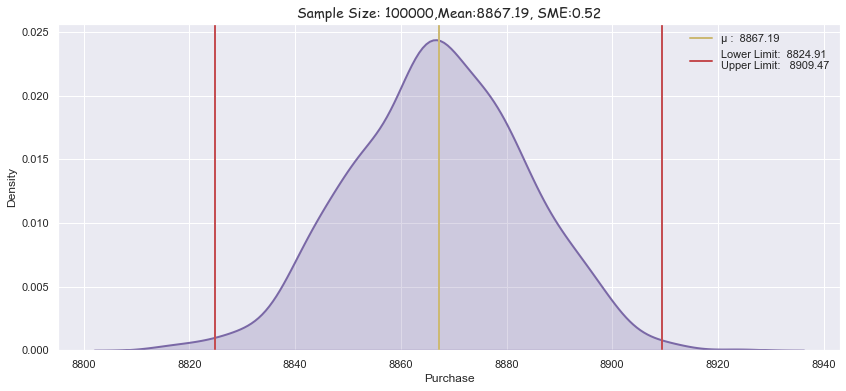

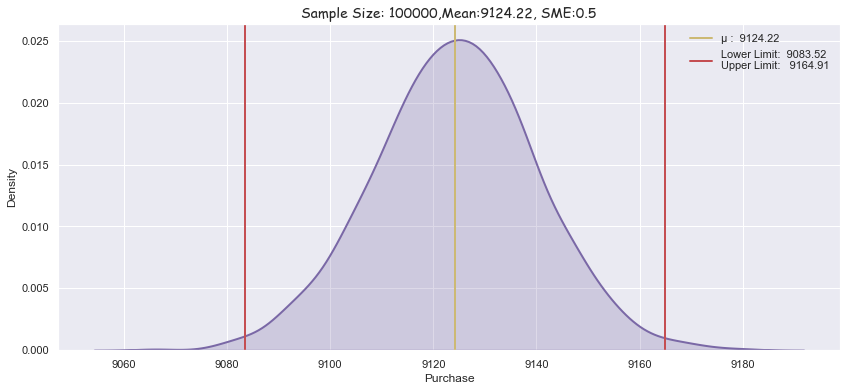

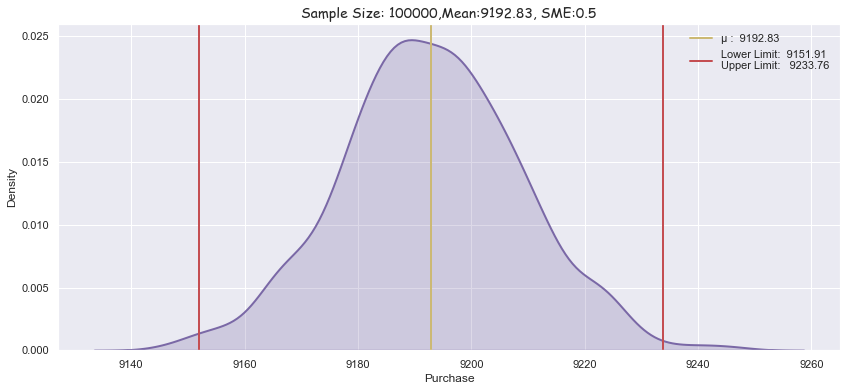

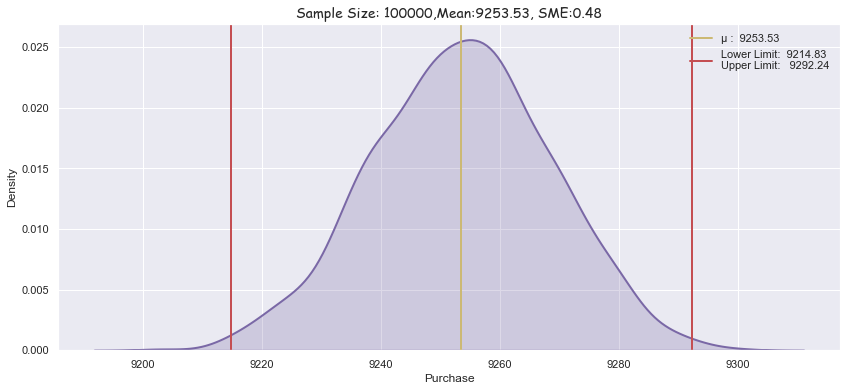

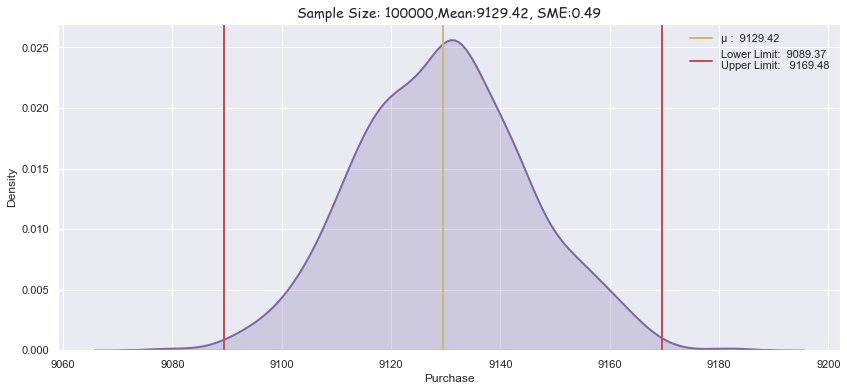

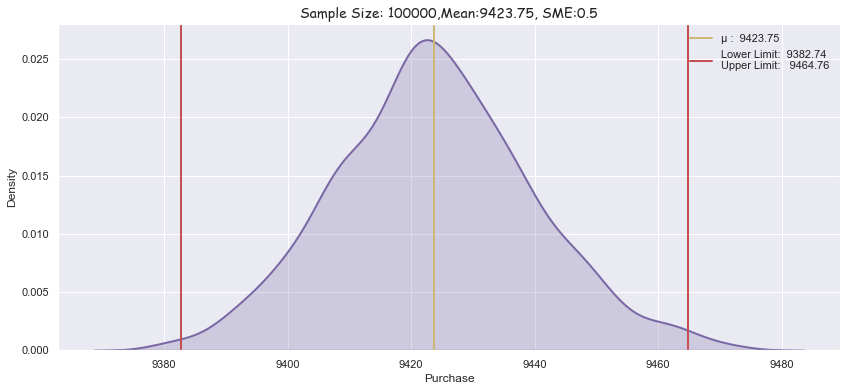

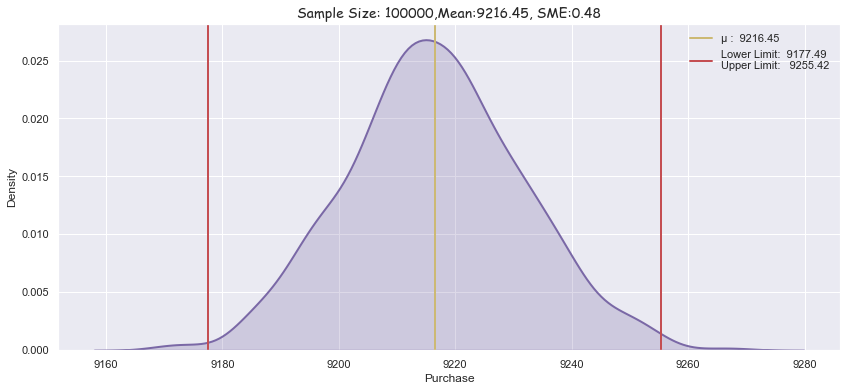

In [585]:
itr_size = 1000
smp_size = 1000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(retail_data_v1[retail_data_v1['Age'] == age]['Purchase'],smp_siz,itr_size,ci)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])


In [586]:
age_data.head(7)

,Age_Group,Mean,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
0,0-17,"[8864.14, 8890.26, 8848.56, 8863.78, 8840.62, ...",8824.91,8909.47,100000,"[8824.91, 8909.47]",84.56,99
1,18-25,"[9128.35, 9129.03, 9121.58, 9114.35, 9148.35, ...",9083.52,9164.91,100000,"[9083.52, 9164.91]",81.39,99
2,26-35,"[9176.77, 9199.71, 9195.26, 9197.12, 9188.61, ...",9151.91,9233.76,100000,"[9151.91, 9233.76]",81.85,99
3,36-45,"[9274.33, 9278.41, 9280.13, 9233.53, 9266.23, ...",9214.83,9292.24,100000,"[9214.83, 9292.24]",77.41,99
4,46-50,"[9124.06, 9168.7, 9153.96, 9131.67, 9133.25, 9...",9089.37,9169.48,100000,"[9089.37, 9169.48]",80.11,99
5,51-55,"[9415.81, 9435.91, 9400.95, 9406.66, 9414.54, ...",9382.74,9464.76,100000,"[9382.74, 9464.76]",82.02,99
6,55+,"[9228.81, 9214.63, 9224.49, 9211.07, 9209.84, ...",9177.49,9255.42,100000,"[9177.49, 9255.42]",77.93,99


### Checking the Sampling distribution of a sample mean for each Age Group

In [587]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

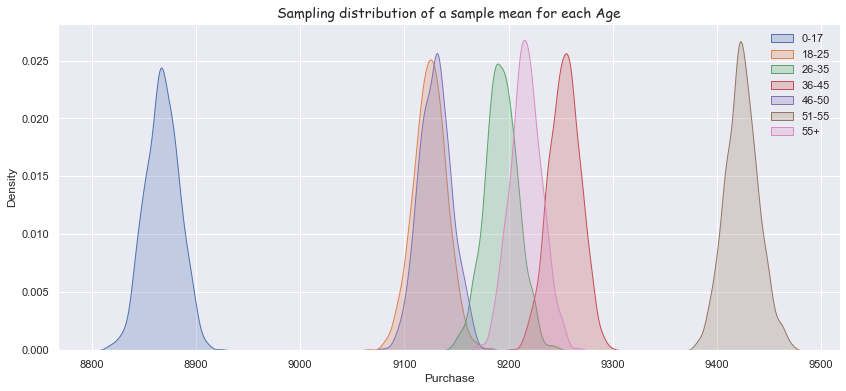

In [588]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age",fontsize=14,family="Comic Sans MS")
plt.xlabel('Purchase')
plt.legend(loc='upper right')

### Inferences 
- Spending by Age_group 0-17 is low compared to other age groups.
- Customers in Age_group 51-55 spend the most between **9381.9 and 9463.7**

### Recommendations 
 - Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
 - The management should have some offers on kids (0-17 years) in order to increase sales. 
 - In order to attract more young shoppers, they can offer some games for the younger generation.

## Inferences & Recommendations 

### Inferences 

#### Based on EDA

 - The majority of our customers come from **city category B ** but customers come from **City category C spent more as mean is 9719**.
 - The majority of users come from **City Category C, but more people from City Category B tend to purchase**, which suggests the same users visit the mall multiple times in City Category B.
 - **Majority of Customers** purchase within the **5,000 - 20,000** range.
 - Males clearly purchase more than females. **75%** of men and only **25%** of women purchase products.
 - Most mall customers are between the ages of **26 and 35**.**60%** of purchases are made by people between the ages of 26 and 45
 - City Category **B accounts for 42%**, City Category **C 31%**, and City Category **A represents 27%** of all customer purchases.Purchases are high in city category C
 - Most mall customers are between the ages of **26 and 35**.City category C has more customers between the ages of **18 and 45.**
 - In City Category C, there are slightly more female customers.
 - Product 5 and 8 is common among females. 

#### Based on Statistical Analysis (using CLT & CI
 - As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size **100000 is 0.49** with confidence is 90%.
 - Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.
 - Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
 - For Female (sample size 100000) range for mean purchase with confidence interval 99% is **[8634.54, 8707.85]**
 - For Male range for mean purchase with confidence interval 99% is **[9328.03, 9409.07]**
 - When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as **[90,95,99]** have difference between the upper & lower limits as **[50.46,59,73.31]**
 - Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
 - Spending by Age_group 0-17 is low compared to other age groups.
- Customers in Age_group 51-55 spend the most between **9381.9 and 9463.7**

### Recommendations

 - In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.
 - Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
 - The management should have some offers on kids (0-17 years) in order to increase sales. 
 - In order to attract more young shoppers, they can offer some games for the younger generation..